#What is the Naive Bayes Classifier
##Brief Introduction

Calling back to our first lesson, Python is a leading language in developing AI and machine learning application. This is due to the ease of use of the language, and the numerous libraries of which allow for the easy implementation  of Ai and machine learning.

##The Naive Bayes algorithm
The Naive Bayes classifier is considered a foundational machine learning model. It is widely used in various applications due to its simplicity and efficiency, especially for classification tasks. The model is based on Bayes' Theorem



###Bayes' Theorem
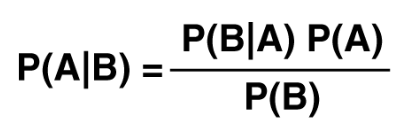


- P(A) — Prior Probability:

This is the prior belief or the probability of the event `A` before observing any new data. It represents the initial probability of the class, based solely on historical data or prior knowledge. In the context of Naive Bayes, if we are trying to classify an email as spam or not spam, `P(A)` would represent the overall proportion of emails that are classified as spam. Think of it as a overall probability.

- P(B|A) — Likelihood:

This is the conditional probability of observing the evidence `B` given that the event `A` (the class) has occurred. In simpler terms, it answers the question: "Given that the class is A, what is the probability that the feature B takes a particular value?" For example, in spam detection, B could be the occurrence of specific words in an email, and `P(B|A)` would tell us how likely these words are to appear in an email, given that the email is spam.

- P(B) — Marginal Probability (Normalizer):

`P(B)` represents the total probability of the evidence B occurring, regardless of the class. It can be thought of as a normalizing constant that ensures the sum of all possible posterior probabilities equals 1. In practice, it allows us to compute the relative likelihood of different classes. `P(B)` is often computed as a sum of the likelihoods across all possible classes:

- P(A|B) — Posterior Probability:

The probability of the class A given the observed evidence B. This is the output of the classifier, reflecting the updated belief about the class after considering the data


#Naive Bayes classifier

Benefits:
- simplicity
- Handles problems with a lot of features(details)
- Scalable
- Good at categorizing data
- insensative to rrelavent features

Issues:
- Assumes that all details are independant of one another
- If feature is not seen during training, its probability is assumed as zero
- Assumes equal importance for every feature
- Cant handle continuous data
- Very sensative to how the data is represented


## Multinomial Naive Bayes

Before diving into its rigorous and simple implementations, take a look at the problem and brainstorm ways to apply the Naive Bayes algorithm.

### Problem Statement


Imagine you are in charge of cybersecurity for a medical company. Your task is to distinguish actual users of your products from hackers attempting to steal user information. Both legitimate users and hackers must write an email detailing their intended use of the product and why they need it.

Fortunately, your company has developed a dataset that includes keywords used by both customers and scammers.


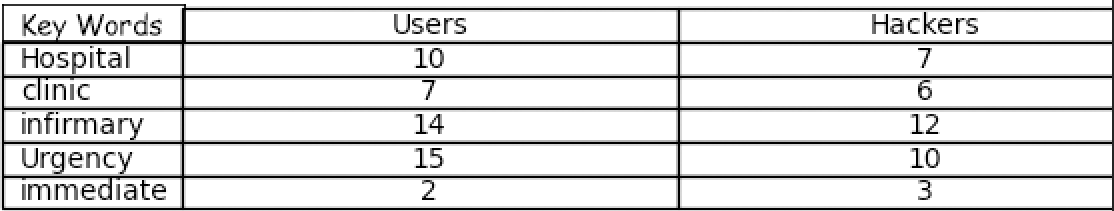



Using the Naive Bayes theorem, create a model to differentiate between legitimate users and hackers.

### No library

First, lets solve this problem with the rigerous implementation of the model so we can see the logic behind it.

In [ ]:
# Creating keyword frequency dictionaries for two categories: Users and Hackers
# Each dictionary stores the frequency of certain keywords used by each group

Users_keywords = {"Hospital": 10, "clinic": 7, "infirmary": 14, "Urgency": 15, "immediate": 2}
Hacker_Keywords = {"Hospital": 7, "clinic": 6, "infirmary": 12, "Urgency": 10, "immediate": 3}

# Now that we have the data, let's write an algorithm based on Bayes' Theorem
# to classify based on these keyword frequencies.

# Step 1: Calculate total keyword frequencies for both Users and Hackers

total_Users = sum(Users_keywords.values())    # Total frequency count for all keywords in Users group
total_Hackers = sum(Hacker_Keywords.values()) # Total frequency count for all keywords in Hackers group
total_all = total_Users + total_Hackers       # Combined total frequency of keywords across both groups


In [ ]:
# Initialize dictionaries to store the likelihoods of each keyword given the User and Hacker categories
Likelihood_user = {}
Likelihood_Hacker = {}

# Get the list of keywords (keys) from the Users_keywords dictionary
# Uses set union to combine the keys from both dictionaries
keys = set(Users_keywords.keys()).union(set(Hacker_Keywords.keys()))

# Loop through each keyword to calculate the likelihood of the keyword for both Users and Hackers
for i in keys:
    # Total usage of the current keyword across both Users and Hackers
    total_use = Users_keywords[i] + Hacker_Keywords[i]

    # Apply Laplace Smoothing to avoid zero probabilities by adding 1 to the count
    # Calculate the likelihood for Users: P(Keyword | User)
    Likelihood_user[i] = (Users_keywords[i] + 1) / total_use

    # Calculate the likelihood for Hackers: P(Keyword | Hacker)
    Likelihood_Hacker[i] = (Hacker_Keywords[i] + 1) / total_use

# Print the calculated likelihoods for Users and Hackers
print(Likelihood_user)
print(Likelihood_Hacker)


{'Hospital': 0.6470588235294118, 'clinic': 0.6153846153846154, 'infirmary': 0.5769230769230769, 'Urgency': 0.64, 'immediate': 0.6}
{'Hospital': 0.47058823529411764, 'clinic': 0.5384615384615384, 'infirmary': 0.5, 'Urgency': 0.44, 'immediate': 0.8}


In [ ]:
# Now we need to calculate the prior probabilities for Users and Hackers.
# The prior probability reflects the overall probability of a category (User or Hacker) occurring,
# regardless of any specific keyword (i.e., P(User) and P(Hacker)).

# Initialize a dictionary to store the priors (if needed later for extension)
Prior = {}

# Calculate the prior probability of each category (Users and Hackers)
for i in keys:
    # Prior probability of the User category: P(User)
    Prior_user = total_Users / total_all

    # Prior probability of the Hacker category: P(Hacker)
    Prior_Hacker = total_Hackers / total_all

# Print the prior probability of the User category
print(Prior_user)


0.5581395348837209


In [ ]:
# Now that we have the prior probabilities and likelihoods, let's calculate the posterior probabilities
# for both the User and Hacker categories using Bayes' Theorem.

# Initialize dictionaries to store the posterior probabilities for each keyword
Posterior_User = {}
Posterior_Hacker = {}

# Loop through each keyword and calculate the posterior probability for both User and Hacker
for key in keys:
    # Posterior for User: P(User | Keyword)
    # Applying Bayes' Theorem: P(User | Keyword) = [P(User) * P(Keyword | User)] / P(Keyword)
    # P(Keyword) is the total frequency of that keyword divided by the total occurrences in both groups
    Posterior_User[key] = (Prior_user * Likelihood_user[key]) / (total_Users / total_all)

    # Posterior for Hacker: P(Hacker | Keyword)
    # Applying Bayes' Theorem: P(Hacker | Keyword) = [P(Hacker) * P(Keyword | Hacker)] / P(Keyword)
    Posterior_Hacker[key] = (Prior_Hacker * Likelihood_Hacker[key]) / (total_Hackers / total_all)

# Print the calculated posterior probabilities for both Users and Hackers
print(Posterior_User)
print(Posterior_Hacker)


{'Hospital': 0.6470588235294118, 'clinic': 0.6153846153846154, 'infirmary': 0.5769230769230769, 'Urgency': 0.64, 'immediate': 0.6}
{'Hospital': 0.47058823529411764, 'clinic': 0.5384615384615384, 'infirmary': 0.5, 'Urgency': 0.44, 'immediate': 0.8000000000000002}


Once calculating the posterior for separate factors and scenarios, the values are typically either argmaxed or softmaxed to simplify them and make predictions. However, my primary goal was to demonstrate how the model works.

#### An organized code

In [ ]:
# Now i am just going to put them in a functional representation
import numpy as np

class Hackerdetector:
    def __init__(self):
        # Initialize keyword data
        self.Users_keywords = {"Hospital": 10, "clinic": 7, "infirmary": 14, "Urgency": 15, "immediate": 2}
        self.Hacker_Keywords = {"Hospital": 7, "clinic": 6, "infirmary": 12, "Urgency": 10, "immediate": 3}

    def calculate_totals(self):
        # Calculate total occurrences
        total_users = sum(self.Users_keywords.values())
        total_hackers = sum(self.Hacker_Keywords.values())
        total_all = total_users + total_hackers
        return total_users, total_hackers, total_all

    def calculate_likelihoods(self):
        # Calculate likelihoods for each category
        total_users, total_hackers, _ = self.calculate_totals()
        likelihood_user = {}
        likelihood_hacker = {}
        all_keys = set(self.Users_keywords.keys()).union(set(self.Hacker_Keywords.keys()))

        for key in all_keys:
            user_count = self.Users_keywords.get(key, 0)
            hacker_count = self.Hacker_Keywords.get(key, 0)
            total_use = user_count + hacker_count
            likelihood_user[key] = (user_count + 1) / (total_use + 1)  # Laplace smoothing
            likelihood_hacker[key] = (hacker_count + 1) / (total_use + 1)  # Laplace smoothing

        return likelihood_user, likelihood_hacker

    def calculate_posteriors(self):
        # Calculate posterior probabilities
        total_users, total_hackers, total_all = self.calculate_totals()
        likelihood_user, likelihood_hacker = self.calculate_likelihoods()

        prior_user = total_users / total_all
        prior_hacker = total_hackers / total_all

        posterior_user = {}
        posterior_hacker = {}

        all_keys = set(self.Users_keywords.keys()).union(set(self.Hacker_Keywords.keys()))

        for key in all_keys:
            posterior_user[key] = (prior_user * likelihood_user[key]) / (total_users / total_all)
            posterior_hacker[key] = (prior_hacker * likelihood_hacker[key]) / (total_hackers / total_all)

        return posterior_user, posterior_hacker
# _______________________________________________________________________________________________________________________________________________

    def add_data(self, keyword, user_count, hacker_count):
        # Update keyword data with new counts
        if keyword in self.Users_keywords:
            self.Users_keywords[keyword] += user_count
        else:
            self.Users_keywords[keyword] = user_count

        if keyword in self.Hacker_Keywords:
            self.Hacker_Keywords[keyword] += hacker_count
        else:
            self.Hacker_Keywords[keyword] = hacker_count

    def predict_keyword_category(self, keyword):
        # Predict which category a keyword is most likely associated with
        posterior_user, posterior_hacker = self.calculate_posteriors()

        if keyword not in posterior_user or keyword not in posterior_hacker:
            return "Keyword not found in the data."

        if posterior_user[keyword] > posterior_hacker[keyword]:
            return f"The keyword '{keyword}' is more likely to be associated with a User."
        else:
            return f"The keyword '{keyword}' is more likely to be associated with a Hacker."


#now, let us test it:

analyzer = Hackerdetector()

# Add new data
analyzer.add_data("emergency", 8, 5)
analyzer.add_data("clinic", 2, 3)

# Make predictions
print(analyzer.predict_keyword_category("Hospital"))
print(analyzer.predict_keyword_category("clinic"))
print(analyzer.predict_keyword_category("emergency"))
print(analyzer.predict_keyword_category("Urgency"))

The keyword 'Hospital' is more likely to be associated with a User.
The keyword 'clinic' is more likely to be associated with a Hacker.
The keyword 'emergency' is more likely to be associated with a User.
The keyword 'Urgency' is more likely to be associated with a User.


### Library

In [ ]:
# You are going to want these libraries:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# First allow us to simply replicate the data, let us use a dictionary
Users_keywords = {"Hospital": 10, "clinic": 7, "infirmary": 14, "Urgency": 15, "immediate": 2}
Hacker_Keywords = {"Hospital": 7, "clinic": 6, "infirmary": 12, "Urgency": 10, "immediate": 3}



lets turn it into a dataframe

In [ ]:
data = {
    'Hospital': [10, 7],
    'clinic': [7, 6],
    'infirmary': [14, 12],
    'Urgency': [15, 10],
    'immediate': [2, 3],
    'label': ['user', 'hacker']
}

df = pd.DataFrame(data)

X = df.drop('label',axis=1)
y = df['label']

model creation

In [ ]:
model = MultinomialNB()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

model.fit(X, y_encoded)

MultinomialNB()

Testing/use

In [ ]:
new_data = {
    'Hospital': [np.random.randint(0, 20)],
    'clinic': [np.random.randint(0, 20)],
    'infirmary': [np.random.randint(0, 20)],
    'Urgency': [np.random.randint(0, 20)],
    'immediate': [np.random.randint(0, 20)]
}

print(new_data)


new_df = pd.DataFrame(new_data)

# Predict using the trained model
prediction = model.predict(new_df)
predicted_label = label_encoder.inverse_transform(prediction)
print(f'The new email is classified as: {predicted_label[0]}')

{'Hospital': [17], 'clinic': [8], 'infirmary': [1], 'Urgency': [5], 'immediate': [12]}
The new email is classified as: hacker


## Gaussian Naive Bayes


#Introduction
Gaussian Naive Bayes is a variant of the Naive Bayes classifier used when dealing with continuous data. Unlike the standard Naive Bayes, which is based on categorical features, Gaussian Naive Bayes assumes that the features follow a Gaussian (normal) distribution.

- Gaussian Distribution: It assumes that the features (predictors) are distributed normally (i.e., they follow a Gaussian distribution) within each class. This is characterized by the mean and standard deviation of the features for each class.

##Calculation Steps in Gaussian Naive Bayes

- Estimate Mean and Variance:

For each feature and each class, compute the mean from the training data.

- Calculate Likelihoods:

Use the Gaussian probability density function to calculate the likelihood of observing each feature value given the class.

- Apply Bayes' Theorem:

Combine the prior probability and the likelihoods of all features to compute the posterior probability for each class.

- Classification:

Assign the class with the highest posterior probability to the observation.

--------------------------------------------------------------------------


Basically, calculate the mean and variance of each feature for each class. Use these values to create a Gaussian probability distribution for each feature, and then use this distribution to determine the likelihood of the feature values.

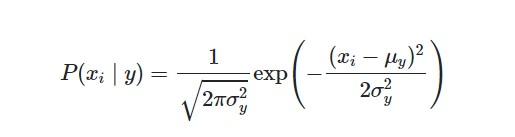

The equation presented above represents the likelihood of which in this case is assumed to be Gaussian.

### What is Gaussian?

Gaussian is a relatively simple concept; it is a normal distribution of data

Things that are gaussian:


Before diving into its rigorous and simple implementations, take a look at the problem and brainstorm ways to apply the Naive Bayes algorithm.

### Problem Statement


You are a researcher who is currently researching and looking into the relationship between the BMI of a person aswell as their general health (whether they have good health or bad health). To further your research, you want to make a simple model to classify people's general health. Develop a naive Bayes algorithm for your research!

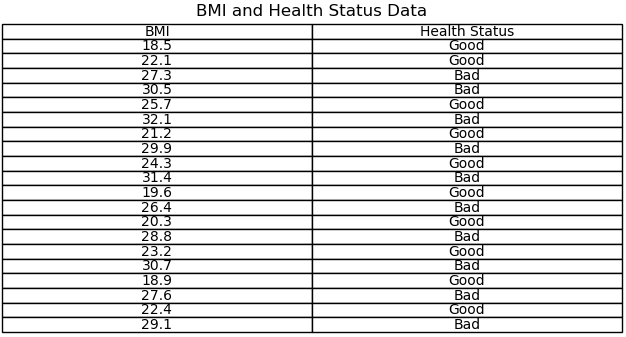

###No Library

In [ ]:
import numpy as np

# Dataset:
# The data dictionary contains feature values (e.g., measurements) and their corresponding labels.
# 0 indicates a "Good" classification, and 1 indicates a "Bad" classification.

data = {
    18.5: 0,
    22.1: 0,
    27.3: 1,
    30.5: 1,
    25.7: 0,
    32.1: 1,
    21.2: 0,
    29.9: 1,
    24.3: 0,
    31.4: 1,
    19.6: 0,
    26.4: 1,
    20.3: 0,
    28.8: 1,
    23.2: 0,
    30.7: 1,
    18.9: 0,
    27.6: 1,
    22.4: 0,
    29.1: 1
}

# Convert the dictionary keys (feature values) and values (labels) into NumPy arrays.
# 'X' will hold the feature values, and 'y' will hold the corresponding labels.

X = np.array(list(data.keys()))  # Array of feature values
y = np.array(list(data.values()))  # Array of labels


In [ ]:
class GaussianNaiveBayes:
    def __init__(self):
        # Initialize the class attributes
        # `self.classes` will store unique class labels
        # `self.means` will store the mean of features for each class
        # `self.variances` will store the variance of features for each class
        # `self.priors` will store the prior probability of each class
        self.classes = np.unique(y)
        self.means = {}
        self.variances = {}
        self.priors = {}

    def fit(self, X, y):
        # Fit the model to the data
        # For each class, compute mean, variance, and prior probability
        for c in self.classes:
            # Select the feature values corresponding to class `c`
            X_c = X[y == c]

            # Compute the mean of features for class `c`
            self.means[c] = np.mean(X_c, axis=0)

            # Compute the variance of features for class `c`
            self.variances[c] = np.var(X_c, axis=0)

            # Compute the prior probability of class `c`
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def _calculate_likelihood(self, mean, variance, x):
        # Calculate the Gaussian probability density function (likelihood)
        # exponent is the exponential term of the Gaussian formula
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance**2))

        # return the likelihood of feature value `x` given the mean and variance
        return exponent / np.sqrt(2 * np.pi * variance)

    def _calculate_posterior(self, x):
        posteriors = []

        # Calculate the posterior probability for each class
        for c in self.classes:
            # Compute the log of the prior probability to avoid numerical underflow
            prior = np.log(self.priors[c])

            # Compute the log of the likelihood for all features and sum them up
            conditional = np.sum(np.log(self._calculate_likelihood(self.means[c], self.variances[c], x)))

            # Calculate the posterior probability
            posterior = prior + conditional

            # Append the posterior probability to the list
            posteriors.append(posterior)

        # Return the class with the highest posterior probability
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        # Predict the class for each instance in `X`
        # Apply `_calculate_posterior` to each feature vector in `X`
        return [self._calculate_posterior(x) for x in X]


# Instantiate the GaussianNaiveBayes model
model = GaussianNaiveBayes()

# Fit the model to the training data
model.fit(X, y)

# Make predictions on the training data
predictions = model.predict(X)

# Print out the predictions
print("Predictions:", predictions)


Predictions: [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


###Library

In [ ]:
# This is a simple implementation of the Gaussian Naive Bayes algorithm using scikit-learn

import numpy as np
from sklearn.naive_bayes import GaussianNB

#ripped from scikit learn website
clf = GaussianNB()
clf.fit(X, y)